**Submitted By :**
- Khalid Waleed Aljandal (438012619)
- Abdulmaleak H bin manea (438010605)
- Aref Mansoor Alotaibi (439027005)

**Supervisor :**
- Prof. Hachemi BENNACEUR

# Introduction
The objective is applying different searching algorithms to reach a specific goal. In a search problem we typically have a set of states, and starting from an initial state we want to find a sequence of actions (transitions) that will take us from the initial state to the goal state. We will explore two types of search algorithms in this notebook. The first is A* (which is an informed search) and simulated annealing (which is a local search algorithm)

# المقدمة
الهدف هو تطبيق خوارزميات بحث مختلفة للوصول إلى هدف محدد. عادة ما يكون لدينا في هذا النوع من مسألة البحث مجموعة من الحالات ، وبدءًا من الحالة الأولية ، نريد العثور على سلسلة من الإجراءات (التحولات) التي ستأخذنا من الحالة الأولية إلى حالة الهدف. سنستكشف نوعين من خوارزميات البحث في هذه االمذكرة.الأولى هي خوازرمية أ* وخوارزمية أخرى وهى التلدين المحاكى

# An Example Problem
We will apply the two search algorithms mentioned above to the path finding problem [1], in which we try to find the route between two points. A path finding problem can be easily formulated as state space search problem, and that enables us to apply the two mentioned searching algorithms on it. More specifically, we can assume that the start point is the initial state, the end point is the destination state and the actions are traversing edges between two points.

The example that we will be using is a graph figure of the cities in KSA and we need the algorithms to help us travel from start city to destination city.

In the figure below [1], we can see a visualization of our problem where we have to find the path from the start (A) to the destination (B)

# مثال على مشكلة
سنطبق خوارزميتي البحث المذكورة أعلاه على مشكلة العثور على المسار [1] ، حيث نحاول العثور على المسار بين نقطتين. يمكن صياغة مشكلة العثور على المسار بسهولة كمشكلة بحث بين عدة حالات ، وهذا يمكننا من تطبيق خوارزمياتي البحث المذكورة أعلاه عليها. بشكل أدق ، يمكننا أن نفترض أن نقطة البداية هي الحالة الأولية ، ونقطة النهاية هي الوجهة والإجراءات هى العبور من نقطة إلى اخرى .
المثال الذي سنستخدمه هنا هو رسم بياني للمدن السعودية ونريد أن تساعدنا الخوارزميات في السفر من مدينة البداية للوصول إلى مدينة الوجهة.

فى الشكل الموضح[1] بالأسفل سنرى توضيح للمشكلة التى نريد حلها وهو أن نجد المسار من نقطة البدأ (ألف) إلى نقطة الوجهة (باء)

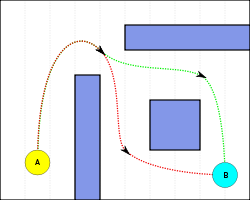

In [0]:
# Figure 1 [1]
from IPython.display import Image
Image(filename='250px-Pathfinding_2D_Illustration.svg.png')

## Defining the graph and plotting the example figure
We will write the first part of our code which is responsible of creating the example graph and displaying it

## تعريف الرسم البيانى ورسمه
هنا سنبدأ بكتابة أول جزء من البرنامج وهو المسئول عن رسم الرسم البيانى الذى يوضح المثال

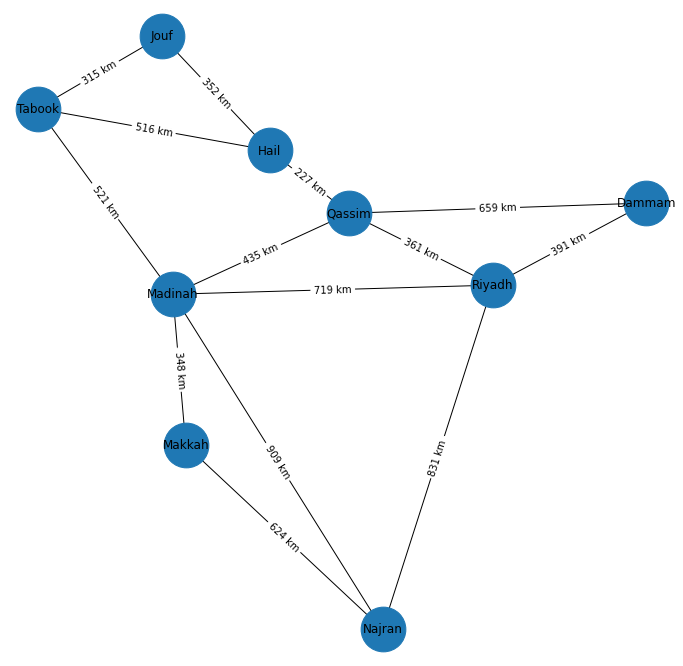

In [0]:
# Include the needed libraries
import networkx as nx
import matplotlib.pyplot as plt
from geopy.distance import lonlat, distance

# Heuristic function h(node,destination). Returns the distance between two cities given their GPS coordinates (longitude, latitude)
def h(node, dst):
  node_coords = G.nodes[node]['pos']
  dst_coords = G.nodes[dst]['pos']
  return distance(lonlat(*node_coords), lonlat(*dst_coords)).km

# Create Graph (Note those are real cities with real GPS coordinates fetched from google)
G=nx.Graph()
G.add_node('Jouf',    pos=(39.3206,29.8874))
G.add_node('Tabook',  pos=(36.5662,28.3835))
G.add_node('Madinah', pos=(39.5692,24.5247))
G.add_node('Qassim',  pos=(43.4837,26.2078))
G.add_node('Riyadh',  pos=(46.6753,24.7136))
G.add_node('Hail',    pos=(41.7208,27.5114))
G.add_node('Najran',  pos=(44.2289,17.5656))
G.add_node('Makkah',  pos=(39.8579,21.3891))
G.add_node('Dammam',  pos=(50.0888,26.4207))

# Edges between cities
edges_list = [("Jouf","Hail",),
              ("Jouf","Tabook"),
              ("Tabook","Madinah"),
              ("Tabook","Hail"),
              ("Hail","Qassim"),
              ("Madinah","Qassim"),
              ("Madinah","Riyadh"),
              ("Madinah","Najran"),
              ("Qassim","Riyadh"),
              ("Riyadh","Najran"),
              ("Makkah","Madinah"),
              ("Makkah","Najran"),
              ("Dammam","Qassim"),
              ("Dammam","Riyadh")]

# Get edge weights between each pair of cities in the edge_list
weighted_edges_list = [(node1,node2,h(node1,node2)) for node1,node2 in edges_list]
G.add_weighted_edges_from(weighted_edges_list)

# Position of each city while we plot will be based on its longitude and latitude
pos = {city:(long, lat) for (city, (long, lat)) in nx.get_node_attributes(G, 'pos').items()}

# Plot the graph
fig, ax = plt.subplots(figsize=(12,12))
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos, node_size=2000, with_labels=True, ax=ax)
# Plot edge labels
edge_labels = {}
for u,v,data in G.edges(data=True):
    edge_labels[(u,v)] = str(int(data['weight'])) + ' km'
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, ax = ax);

# The Algorithms  (الخوارزميات)

## First: The A* Algorithm


### Explanation:

Th algorithm [2] starts from a source node and tries to find the shortest path to the destination.

Starting from a set contraining only the source node we try to find the next node to travel to. Considering all the neighbour nodes to the starting node, it is obvious that if we choose a path from the source to destination passing by a certain node, then the total path length is the sum of the distance from the source to this node + the distance from this node to the destination.

The first part is easy since we can keep track how much we travelled starting from a source node, for the second part though, the algorithm makes use of a heuristic function that can guess the distance to the destination given any particular node. 

Figure [3] below illustrates the A* algorithm. The nodes represent cities, roads between cities are repesented as graph edges, and the weights on the edges can be considered the length of those roads. Here is the heuristic function is simply the straight line length between each city. Since the straight line length is the shortest path between any two points, we can conculde that the heuristic used here is an underestimation of the real path length and this gurantees an optimal solution.


In our example problem this heuristic function will be the distance between the two cities based on their longitude and latitude

## *أولا: خوارزمية أ


### :الشرح

تبدأ هذه الخوارزمية من عند نقطة المصدر وتحاول العثور على أقصر مسار إلى الوجهة.


بدءًا من مجموعة لا تحتوي إلا على نقطة المصدر ، نحاول العثور على النقطة التالية للانتقال إليها. بالنظر في جميع النقط المجاورة لنقطة البداية. من الواضح أنه إذا اخترنا مسارًا من المصدر إلى الوجهة يمر عبر نقطة معينة ، فإن إجمالي طول المسار هو مجموع المسافة من المصدر إلى هذه النقطة زائد المسافة من هذه النقطة إلى الوجهة.

الجزء الأول سهل حيث يمكننا تتبع مقدار المسافة التي تم قطعها بدءًا من نقطة المصدر ، أما بالنسبة إلى الجزء الثاني ، تستخدم الخوارزمية دالة إرشادية يمكنها تخمين المسافة إلى الوجهة بالنظر إلى أي نقطة معينة.

الشكل 3 الموضح بالأسفل يوضح كيف تعمل الخوارزمية, النقاط هنا تمثل المدن والحواف أو الخطوط تمثل الطرق بين المدن والأرقام فوق الحواف تمثل طول هذه الطرق. هنا الدالة الإرشادية المستخدمة هى المسافة الخط المستقيم إلى نقطة الوجهة وبما إننا نعرف أن الخط المستقيم هو أقصر طريق بين أى نقطتين إذا الدالة الإرشادية هنا لابد أن تكون أقل من أو تساوى الطول الحقيقى للمسار وهذا يضمن لنا أن الخوارزمية ستصل إلى الحل الأفضل


في مثالنا ، ستكون هذه الدالة الإرشادية هي المسافة بين المدينتين بناءً على خط الطول وخط العرض




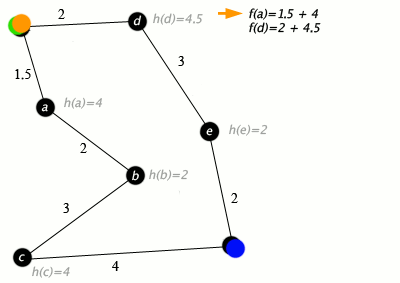

In [0]:
# Figure 2 [3]
from IPython.display import Image
Image(filename='AstarExampleEn.png')

### Implementation
Now we will see how to implement the algorithm from scratch

### التنفيذ
والان سنرى كيف يتم تنفيذ الخوارزمية من الصفر

In [0]:
# Include the needed libraries
import math
from operator import itemgetter
from collections import defaultdict

def reconstruct_path(parent, cur_node):
  """
  Reconstructs the path given the goal node and the parent map by back tracking from the goal node to its parent
  and from this parent to its parent and so on till we trace back to the source node
  """
  path = [cur_node]
  while cur_node in parent:
      cur_node = parent[cur_node]
      path.append(cur_node)
  return path[::-1]


def a_star(src, dst):
  """
  This is the implementation of the A* algorithm. It returns the path from the source to destination after executing the search
  """
  # The set of discovered nodes so far
  open_set = set()
  open_set.add(src)
  # Parent dictionary. Keeps track of the best found parent to a particular node
  parent = defaultdict()
  # A dictionary which stores for any node the cost of the shortest path from source to it
  g_score = defaultdict(lambda: math.inf)  
  g_score[src] = 0
  #  A dictionary which stores the current guess of the length of the path from the source to the destination passing by a certain node
  f_score = defaultdict(lambda: math.inf)  
  f_score[src] = h(src, dst)

  while len(open_set) > 0:
    # Get the current node, the node with the lowest f score
    cur_node = min(enumerate(open_set), key= lambda x: f_score[x])[1]

    # If the current node is the destination, then path is found and we can return it
    if cur_node == dst:
      return reconstruct_path(parent, cur_node)

    open_set.remove(cur_node)
    for neighbor in G.neighbors(cur_node):
        # G[cur_node][neighbor]['weight'] is the weight of the edge from current to neighbor
        # cur_neighbor_gscore is the distance from start to the neighbor through current
        cur_neighbor_gscore =   g_score[cur_node] + G[cur_node][neighbor]['weight']
        if cur_neighbor_gscore < g_score[neighbor]:
            # If This path to the neighbor is better than any previous one, recongise it as the best path so far
            parent[neighbor] = cur_node
            g_score[neighbor] = cur_neighbor_gscore
            f_score[neighbor] = cur_neighbor_gscore + h(neighbor, dst)
            if neighbor not in open_set:
                open_set.add(neighbor)

### Applying the algorithm to the problem
Let's define a source city and a destination city and call our a_star method which should return the shortest path.
You can change the source and destination to different cities to test the algorithm


### استخدام الخوارزمية على مشكلتنا
سنقوم بتحديد نقطة المصدر والوجهة ثم نستخدم الخوارزمية التى ستقوم بإرجاع المسار إلى الوجهة. يمكنك تغيير نقطة المصدر والوجهة كما تريد لإختبار الخوارزمية

In [0]:
src = 'Jouf'
dst = 'Najran'
total_path = a_star(src,dst)

Now let's see an animation of the found path which illustrates how to reach Najran from Jouf

والان لنرى رسوم متحركة توضح لنا كيف يمكن أن نصل إلى نجران من الجوف

In [0]:
import matplotlib.animation
import matplotlib.pyplot as plt
from IPython.display import HTML

# Build plot
fig, ax = plt.subplots(figsize=(12,12))
plt.close()

def animate(frame):
    ax.clear()
    # Path nodes
    path_nodes = total_path[0:frame+1]
    # Path edges
    path_edges = [path_nodes[k:k+2] for k in range(len(path_nodes) - 1)]
    # Draw the whole graph
    nx.draw(G, pos, with_labels = True, node_size = 1850, ax = ax)
    # Plot edge labels
    edge_labels = {}
    for u,v,data in G.edges(data=True):
        edge_labels[(u,v)] = str(int(data['weight'])) + ' km'
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, ax = ax);
    # Draw the path edges so far with a thicker width to highlight them
    nx.draw_networkx_edges(G, pos=pos, edgelist = path_edges, edge_color='r', width = 5, ax=ax)
    # Scale plot ax
    ax.set_title("Path: {}".format("-".join(path_nodes)), fontweight="bold")



ani = matplotlib.animation.FuncAnimation(fig, animate, frames= len(total_path), interval=1000)
HTML(ani.to_html5_video())

### Testing on another sample
Let's try the algorithm again with a different source and destination


### إختبار الخوارزمية على عينة أخرى
سنقوم بإختبار الخوارزمية على مصدر ووجهة أخرى

In [0]:
src = 'Tabook'
dst = 'Dammam'
total_path = a_star(src,dst)

# Build plot
fig, ax = plt.subplots(figsize=(12,12))
plt.close()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames= len(total_path), interval=1000)
HTML(ani.to_html5_video())

## Second: The Simulated Annealing Algorithm

### Explanation:

The simulated annealing algorithm is a simple yet powerful algorithm. The intuition behind the algorithm is when you are still in the beginning of the journey from the source node you want to explore nodes around you randomly since you still most likely far from the goal and you don't want to limit your options based on heuristics. After a traversing some nodes on your way to the destination you want to make moves that will gradually decrease your distance to the destination and stop moving too randomly. The first phase is mostly referred to as exploration and the second is exploitation where you likely have found a good path and now you want to exploit what you have till you reach your destination. 

More formally we do hill climbing except that we might choose a random move that worsens our current solution with a probability "p". This probability is related to the temperature. In the beginning the temperature is high so the probability of choosing a random move is relatively high. Later on the temperature decreases and we will almost always choose the option that minimizes the cost.

This is illustrated by the below figure [4]. Observe that in the beginning the temperature is high, and the line moving randomly across the points. The temperature then decreases with time and the more the temperature decreases the more that the algorithm will be like a hill climbing algorithm


## ثانيا: خوارزمة التلدين المحاكى

### الشرح:

خوارزمية التلدين المحاكية هي خوارزمية بسيطة لكنها قوية. الحدس وراء الخوارزمية هو عندما تكون لا تزال في بداية الرحلة من المصدر فأنت تريد استكشاف النقاط بشكل عشوائي لأنك على الأرجح بعيدًا عن الهدف ولا تريد تحديد خياراتك بناءً على دالة الاستدلال. بعد اجتياز بعض النقاط في طريقك إلى الوجهة التي تريد الوصول إليها ، ستقلل القيام بحركات بشكل عشوائى وستقوم بإحتمالية أكبر بإختيار الحركات اللى تقلل المسافة إلى الوجهة. يشار إلى المرحلة الأولى في الغالب باسم الاستكشاف والثاني هو الاستغلال حيث من المحتمل أنك وجدت مسارًا جيدًا والآن تريد استغلال ما لديك حتى تصل إلى وجهتك.

بشكل رسمي أكثر فإننا نقوم بتنفيذ خوارزمية تسلق التل باستثناء أننا قد نختار حركة عشوائية تزيد من سوء حلنا الحالي مع احتمال "ص". هذا الاحتمال مرتبط بدرجة الحرارة. في البداية كانت درجة الحرارة مرتفعة لذا فإن احتمال اختيار حركة عشوائية مرتفع نسبيًا. في وقت لاحق تنخفض درجة الحرارة وسنختار دائمًا الخيار الذي يقلل التكلفة.

هذا موضح فى الشكل بالأسفل[4]. لاحظ أن فى البداية درجة الحرارة مرتفعة وحركة الخط عشوائية ولكن مع مرور الوقت تنخفض درجة الحرارة وتتصرف هذه الخوارزمية بشكل مقارب جدا لخوارزمية تسلق التل

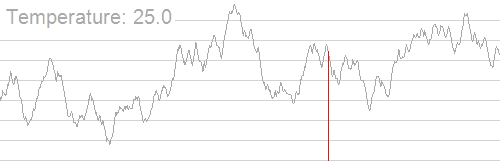

In [0]:
# Figure 3 [5]
from IPython.display import Image
Image(filename='Hill_Climbing_with_Simulated_Annealing.png')

### Implementation:

In [0]:
import random
import numpy as np

def temperature(fraction):
    """ The temperature decreases as the exploration goes on """
    return max(0.0001, 1 - fraction)

def random_neighbour(node):
  """ Returns a random neighbor from the neighbors of a node """
  neighbors = list(G.neighbors(node))
  return random.choice(neighbors)

def accept_prob(best_cost, new_cost, T):
  """ Returns the probability to accept the new node and traverse into it """
  if new_cost < best_cost:
    return 1
  else:
    return np.exp(- (new_cost - best_cost) /  T)


def simulated_annealing(src, dst, max_steps):
  """ Runs the simulated annealing algorithm """
  # Initialize best node to be the source node and add it to path
  best_node = src
  best_cost = h(best_node, dst)
  path = [best_node]

  for step in range(1,max_steps+1):
    # The fraction represents how time has elapsed since the start of the program 
    fraction = step / float(max_steps)
    T = temperature(fraction)
    # Get a new random node and its cost
    new_node = random_neighbour(best_node)    
    new_cost = h(new_node, dst)
    # If we will accept the new node, then replace the best node with the current one
    if accept_prob(best_cost, new_cost, T) > random.random():
      best_node = new_node
      best_cost = new_cost
      # Add the new best to path
      path.append(best_node)
    
  return path

### Applying the Algorithm on our problem
Now let's choose a source and a destination and let the algorithm find the path. (we are choosing max_steps = 15). Try running this part again then visualize the result, notice how this randomized algorithm doesn't always give us the same path

### استخدام الخوارزمية على مشكلتنا
سنقوم بتحديد نقطة المصدر والوجهة ثم نستخدم الخوارزمية التى ستقوم بإرجاع المسار إلى الوجهة. (سنختار عدد خطوات=15) ,جرب أن تقوم بإعادة تشغيل هذا الجزء وتصور النتيجه, لاحظ كيف قد تحصل على مسارات مختلفة كل مرة لأن هذه الخوارزمية تعتمد على اختيار ارقام عشوائية 

In [0]:
src = 'Tabook'
dst = 'Najran'
total_path = simulated_annealing(src,dst, 15)

Now let's visualize the resulting path

الان تصور مسار النتيجه

In [0]:
fig, ax = plt.subplots(figsize=(12,12))
plt.close()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames= len(total_path), interval=1000)
HTML(ani.to_html5_video())

### Testing on another sample
Let's try the algorithm again with a different source and destination


### إختبار الخوارزمية على عينة أخرى
سنقوم بإختبار الخوارزمية على مصدر ووجهة أخرى

In [0]:
src = 'Jouf'
dst = 'Dammam'
total_path = simulated_annealing(src,dst, 15)

Now, like before, let's visualize the result

والان مثل قبل, لنرى الحل بالرسوم المتحركة

In [0]:
fig, ax = plt.subplots(figsize=(12,12))
plt.close()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames= len(total_path), interval=1000)
HTML(ani.to_html5_video())

Note that using an unnecessary large number of steps may lead to very sub-optimal solutions. The algorithm may take too many random steps in the beginning.

In conclusion:

* We see that the A* algorithm using a heuristic that underestimates the distance to the goal will help us find the optimal solution, while there is no gurantee that the SA algorithm will generate the optimal solution.

* Running the same SA algorithm with the same input multiple times may result in different outcomes since it depends on random variables, while in the case of A* we get the same solution every time we run the algorithm with the same inputs


| Simulated Annealing | A*  |
|------|------|
|   No gurantee to find the optimal solution  | Finds the optimal solution if the heuristic underestimates the distance to goal|
|   Randomized algorithm with different outcomes each time | Gives similar results each run




لاحظ إن إستخدام عدد غير لازم من الخطوات الكبيرة للغاية قد يكون له أثر سلبى لأن الخوارزمية ستقوم 
بخطوات عشوائية كثيرة فى البداية

فى النهاية يمكننا استنتاج:

* خوارزمية أ* ستصل بنا إلى الحل الأمثل اذا استخدمنا دالة إرشادية تعطينا عند أى نقطة مسافة إلى الهدف أقل من أو تساوى المسافة الحقيقية بينما لا يوجد ضمان ان خوارزمية التلدين المحاكى ستولد لنا الحل الامثل 

* استخدام خوارزمية التلدين المحاكى مرات مختلفة بنفس المدخلات قد يعطينا نتائج مختلفة وهذا لأننا نعتمد على متغيرات عشوائية ولكن عند استخدام خوارزمية أ* سنصل إلى نفس النتيجة عند كل مرة نستخدم فيها نفس المدخلات


| التلدين المحاكى | أ* ستار  |
|------|------|
|   لا يضمن لنا الوصول إلى الهدف بأفضل طريق  | يضمن الوصول إلى الهدف بأفضل طريق عند استخدام دالة إرشادية مناسبة|
|   خوارزمية عشوائية قد تعطينا نتائج مختلفة لنفس المدخلات | خوارزمية تعطينا نفس النتائج كل مرة عند استخدام نفس المدخلات



# References and Resources (المصادر)
[1] https://en.wikipedia.org/wiki/Pathfinding

[2] https://en.wikipedia.org/wiki/A*_search_algorithm

[3] https://upload.wikimedia.org/wikipedia/commons/9/98/AstarExampleEn.gif

[4] https://www.sciencedirect.com/topics/engineering/simulated-annealing-algorithm

[5] https://upload.wikimedia.org/wikipedia/commons/d/d5/Hill_Climbing_with_Simulated_Annealing.gif
